# Pokemon Analysis and Visualization


### Import Necessary Modules


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


### Read CSV File and Display Starting Data


In [58]:
df = pd.read_csv("pokemon_data.csv")

In [6]:
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
df.describe

<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45       

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [10]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<Axes: >

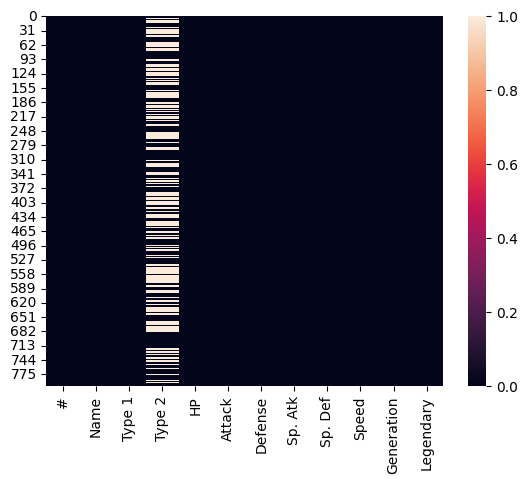

In [11]:
sns.heatmap(df.isnull())


[Text(0.5, 0, 'Primary Type'), Text(0, 0.5, 'Count')]

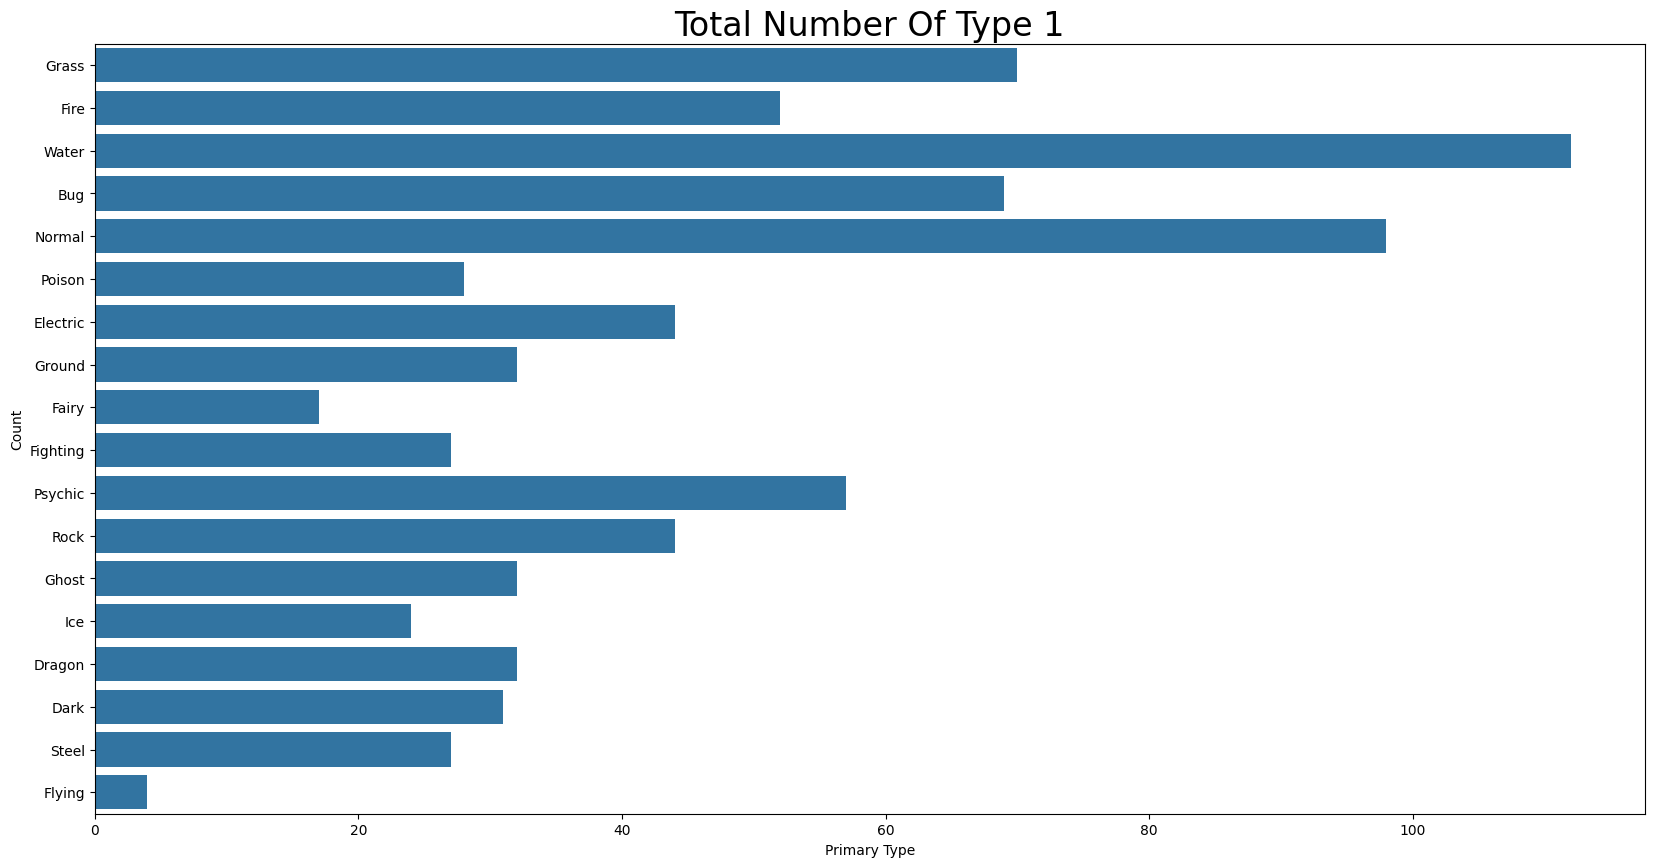

In [12]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df['Type 1'])
ax.set_title("Total Number Of Type 1",fontsize=24)
ax.set(xlabel="Primary Type", ylabel="Count")

In [27]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="count", order=df['Type 2'],value_counts().index[0:15])
ax.set_title("Total Number Of Type 2",fontsize=24)
ax.set(xlabel="Primary Type", ylabel="Count")

SyntaxError: positional argument follows keyword argument (1226464808.py, line 2)

### correlation

<Axes: >

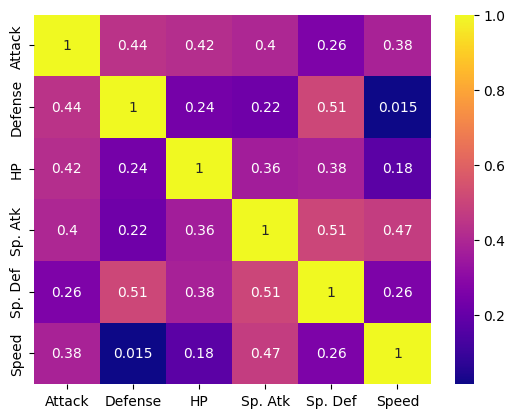

In [17]:
#_,(ax, cbar_ax) = plt.subplots(2, gridspec_kw= {"height_ratios": (1, .04), "hspace":.3}, figsize=(18,9))
sns.heatmap((df.loc[:,['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed']]).corr(), annot= True,
            #fmt = "3.3f",
            #vmin = -1,
            #vmax = 1,
            #ax=ax,
          #cbar=True,
            #cbar_kws={"orientation": "horizontal"},
            cmap="plasma")


<Axes: >

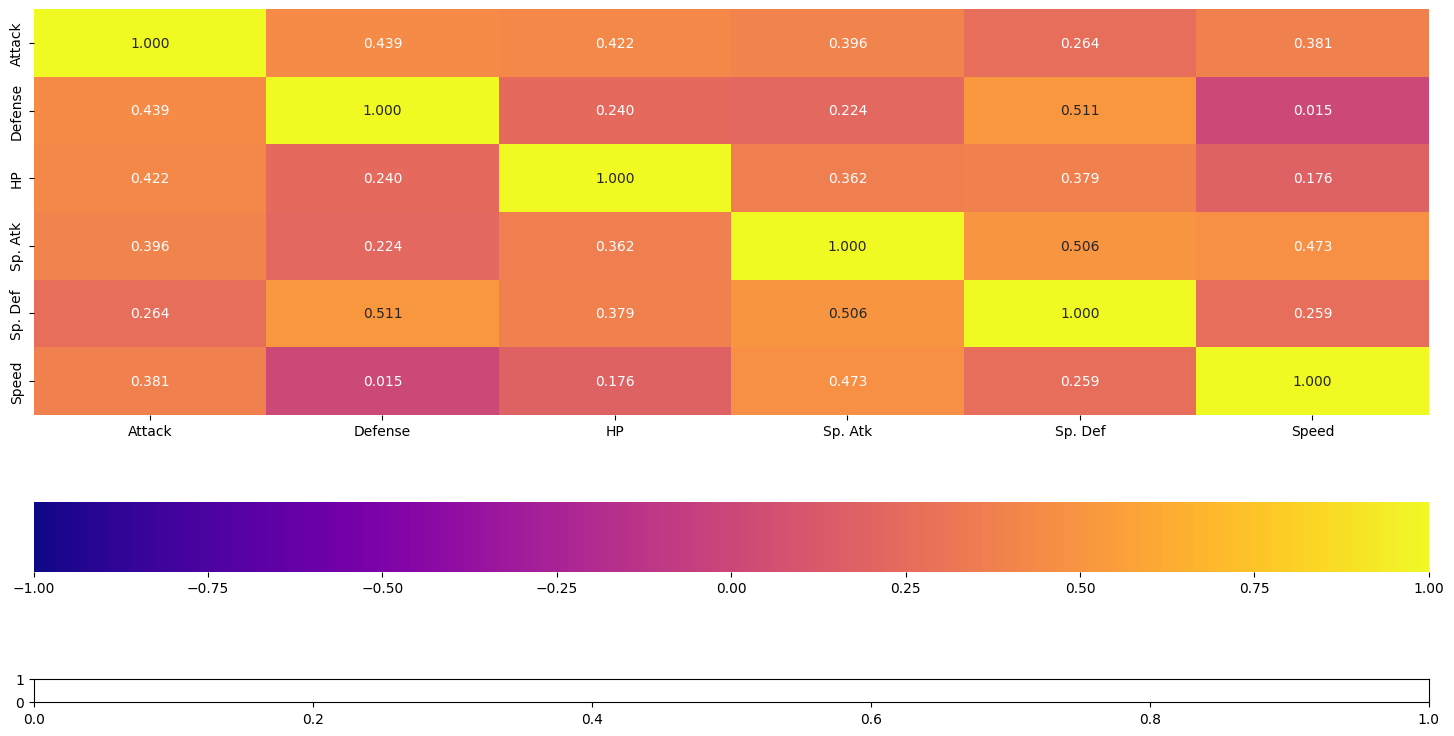

In [18]:
_,(ax, cbar) = plt.subplots(2, gridspec_kw= {"height_ratios": (1, .04), "hspace":.3}, figsize=(18,9))
sns.heatmap((df.loc[:,['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed']]).corr(), annot= True,
            fmt = "3.3f",
            vmin = -1,
            vmax = 1,
            ax=ax,
          cbar=cbar,
            cbar_kws={"orientation": "horizontal"},
            cmap="plasma")

In [19]:
df= pd.DataFrame(df)


### The Pokemon with Highest Total


In [20]:
df[df['HP']==df['HP'].max()]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [21]:
df[df['Generation']==df['Generation'].max()].head(1)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False


### The Pokemon with Lowest Total


In [22]:
df[df['Attack']==df['Attack'].min()]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,NaN,100,5,5,15,65,30,4,False


<Axes: >

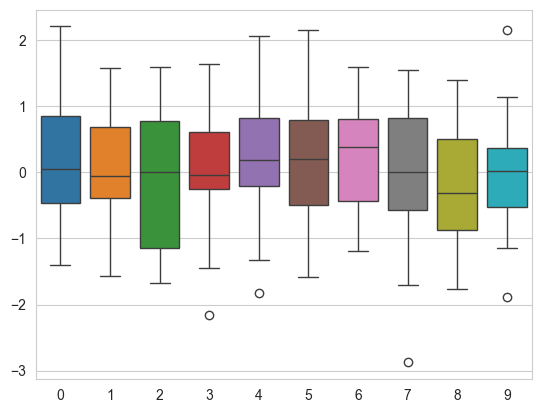

In [23]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20,10))#+ np.arange(10) / 2
sns.boxplot(data=data)

### What is the  Type 1 and Type 2 of the Lowest Total Pokemon?


In [38]:
print(df[df['HP']==df.HP.max()]['Type 1'],'\n')
print(df[df['HP']==df.HP.max()]['Type 2'])

261    Normal
Name: Type 1, dtype: object 

261    NaN
Name: Type 2, dtype: object


<Axes: xlabel='count', ylabel='Type 2'>

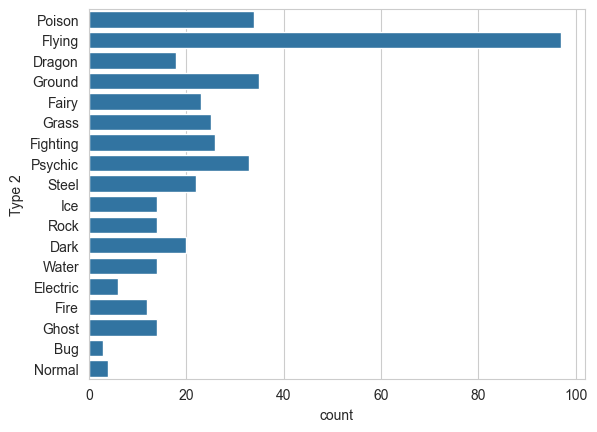

In [24]:
sns.countplot(df['Type 2']) #y axis is count by default


## Filtering

### Single Filter


In [39]:
attack = df[df['Attack']>150]
attack.head(8)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False
279,257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False
387,354,BanetteMega Banette,Ghost,NaN,64,165,75,93,83,75,3,False


### method 2


In [40]:
attack_2 = df['Attack'].map(lambda atk:atk>150)
df[attack_2]['Attack'].min()


155

### method 3


In [42]:
attack_pokemons = []
for atck in df['Attack']:
    if atck > 150:
        attack_pokemons.append(True)
    else:
        attack_pokemons.append(False)

attack_3 = pd.Series(attack_pokemons)
df[attack_3].head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False


## Muliple Filtering


In [43]:
attack_defense = df[(df['Attack']>100) & (df['Defense']>100)]
attack_defense.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
82,76,Golem,Rock,Ground,80,120,130,55,65,45,1,False
107,99,Kingler,Water,NaN,55,130,115,50,50,75,1,False
120,112,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False
152,141,Kabutops,Rock,Water,60,115,105,65,70,80,1,False
224,208,SteelixMega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False


### Check those Pokemon that belongs to two Type


In [54]:
fire_water = df[(df["Type 1"]=="FIRE") & (df['Type 2']=="DRAGON")]
fire_water.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [61]:
print("Bug Minimum(t1):",df.groupby("Type 1")["HP"].min()["Bug"])  
print("Fire Min(t2):",df.groupby("Type 2")["HP"].min()["Fire"])
print("Water Mean(t1):",df.groupby("Type 1")["HP"].mean()["Water"])
print("Lightening Count(t2):",df.groupby("Type 2")["HP"].count()["Electric"])

Bug Minimum(t1): 1
Fire Min(t2): 45
Water Mean(t1): 72.0625
Lightening Count(t2): 6


In [62]:
df[df['Type 2']=='Fire']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
246,228,Houndour,Dark,Fire,45,60,30,80,50,65,2,False
247,229,Houndoom,Dark,Fire,75,90,50,110,80,95,2,False
248,229,HoundoomMega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
532,479,RotomHeat Rotom,Electric,Fire,50,65,107,105,107,86,4,False
553,494,Victini,Psychic,Fire,100,100,100,100,100,100,5,True
668,607,Litwick,Ghost,Fire,50,30,55,65,55,20,5,False
669,608,Lampent,Ghost,Fire,60,40,60,95,60,55,5,False
670,609,Chandelure,Ghost,Fire,60,55,90,145,90,80,5,False
697,636,Larvesta,Bug,Fire,55,85,55,50,55,60,5,False


Check groupby method of Type1 and Type2 Pokemon and Plot a BarGraph



<Axes: title={'center': 'Type 2'}, xlabel='Type 2'>

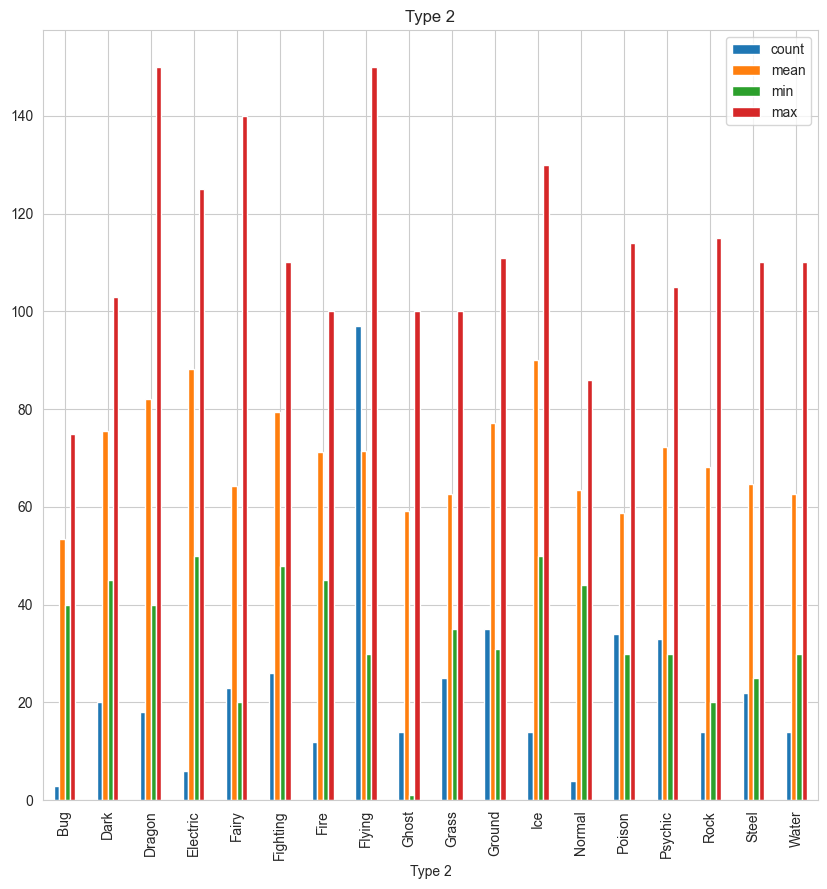

In [74]:
df.groupby("Type 2")["HP"].agg(["count","mean","min","max"]).plot(kind="bar",figsize=(10,10),title="Type 2")


<Axes: title={'center': 'Type 1'}, ylabel='Type 1'>

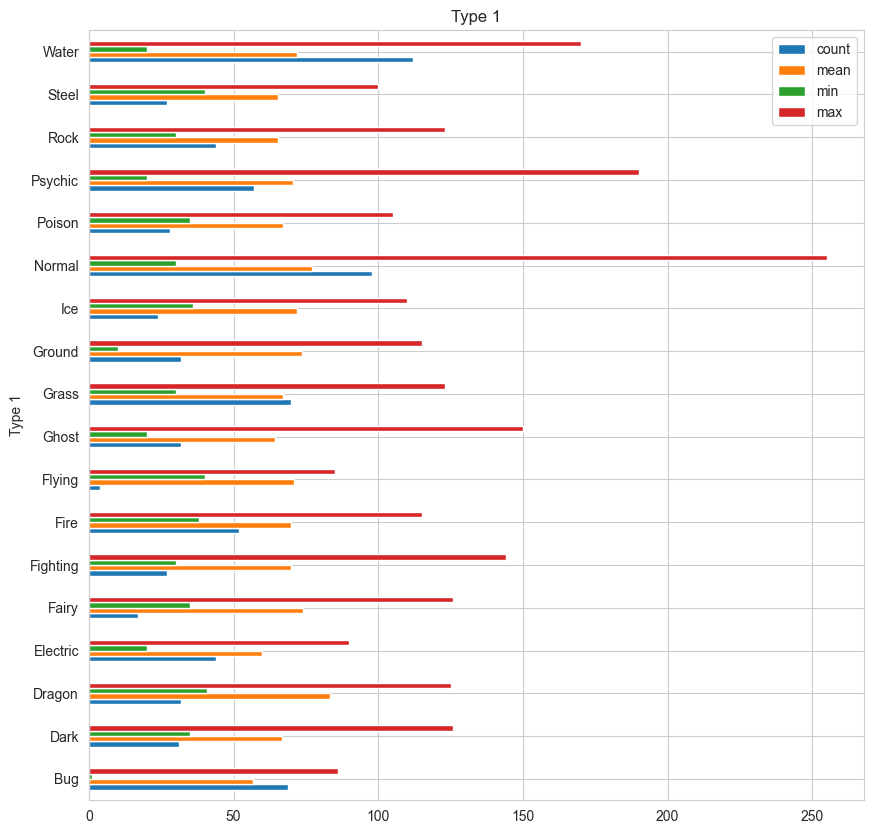

In [77]:
df.groupby('Type 1')['HP'].agg(['count','mean','min','max']).plot(kind="barh",figsize=(10,10),title="Type 1",grid=True)


### Fire Pokemon Visualization


In [79]:
Fire_pokemons = df[df['Type 1']=='Fire']


In [80]:
Fire_pokemons.shape


(52, 12)

Check the Pokemon with the highest speed among the fire Pokemon



In [82]:
Fire_pokemons[Fire_pokemons["Speed"]==Fire_pokemons["Speed"].max()]


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
731,663,Talonflame,Fire,Flying,78,81,71,74,69,126,6,False


In [93]:
Fire_pokemons_names = df[(df['Type 1']=="Fire") & (df['Speed']>100)] ["Name"]
Fire_strength = df[(df['Type 2']=="Fire") & (df['Speed']>100)].Speed

Text(0, 0.5, 'Speed')

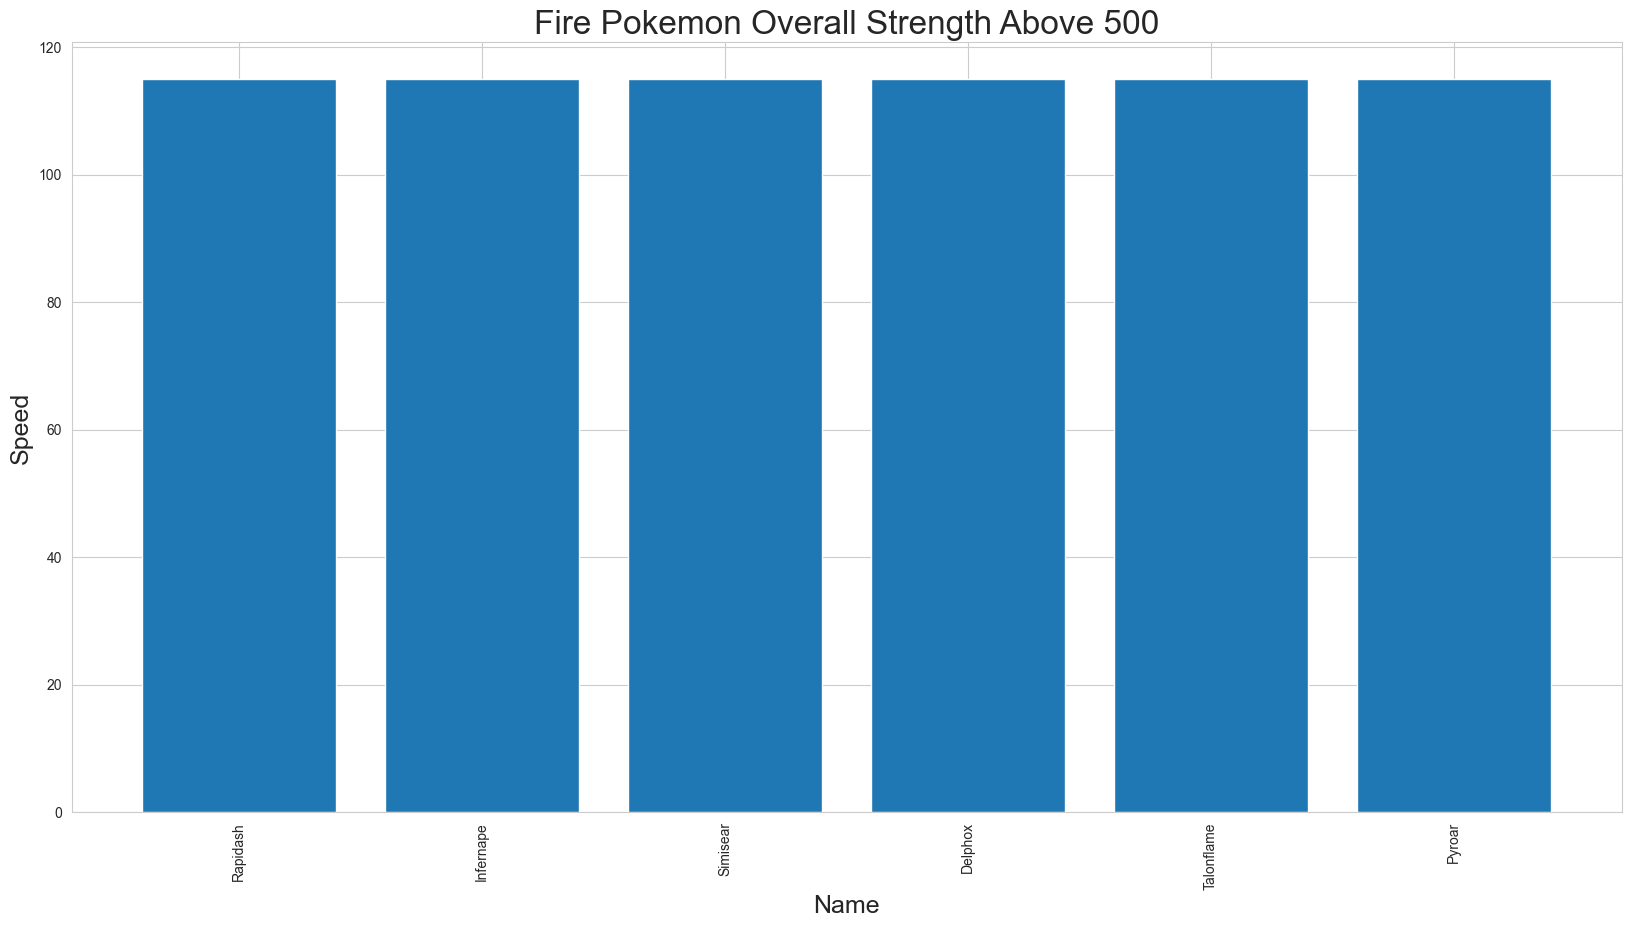

In [94]:
plt.figure(figsize=(20,10))
plt.title("Fire Pokemon Overall Strength Above 100",fontsize=24)
plt.bar(Fire_pokemons_names,Fire_strength)
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=18)
plt.ylabel("Speed",fontsize=18)

Text(0, 0.5, 'Count Range')

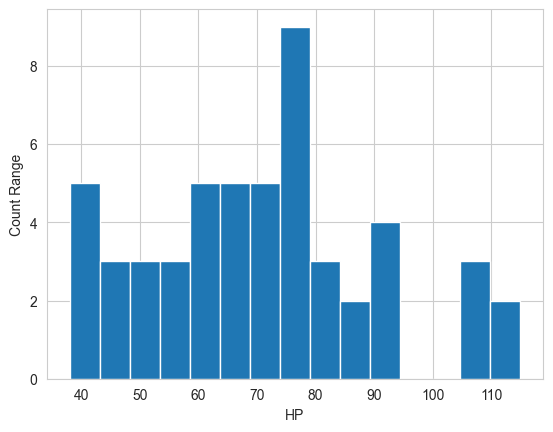

In [104]:
plt.hist(Fire_pokemons['HP'],bins=15)
plt.xlabel("HP")
plt.ylabel("Count Range")

### Water Pokemon Visualization


In [106]:
Water_pokemons = df[df['Type 1']=="Water"]


In [107]:
Water_pokemons.head(5)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False


In [111]:
print(Water_pokemons['Speed'].shape)
print(Fire_pokemons['Speed'].shape)

(112,)
(52,)


In [112]:
Water_pokemons.isnull().sum()


#              0
Name           0
Type 1         0
Type 2        59
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Generation     0
Legendary      0
dtype: int64

### Check Out the Attack Relationship between Water and Fire Pokemon


In [114]:
fire_pokemon = Fire_pokemons['Attack'].sort_values()[::-1].iloc[0:15]


In [116]:
Water_pokemon = Water_pokemons['Speed'].sort_values()[::-1].iloc[0:15]
fire_pokemon

279    160
615    140
7      130
147    130
270    130
559    123
278    120
354    120
263    115
64     110
799    110
8      104
437    104
158    100
84     100
Name: Attack, dtype: int64

Text(0, 0.5, 'Top 15  Fire Pokemons ')

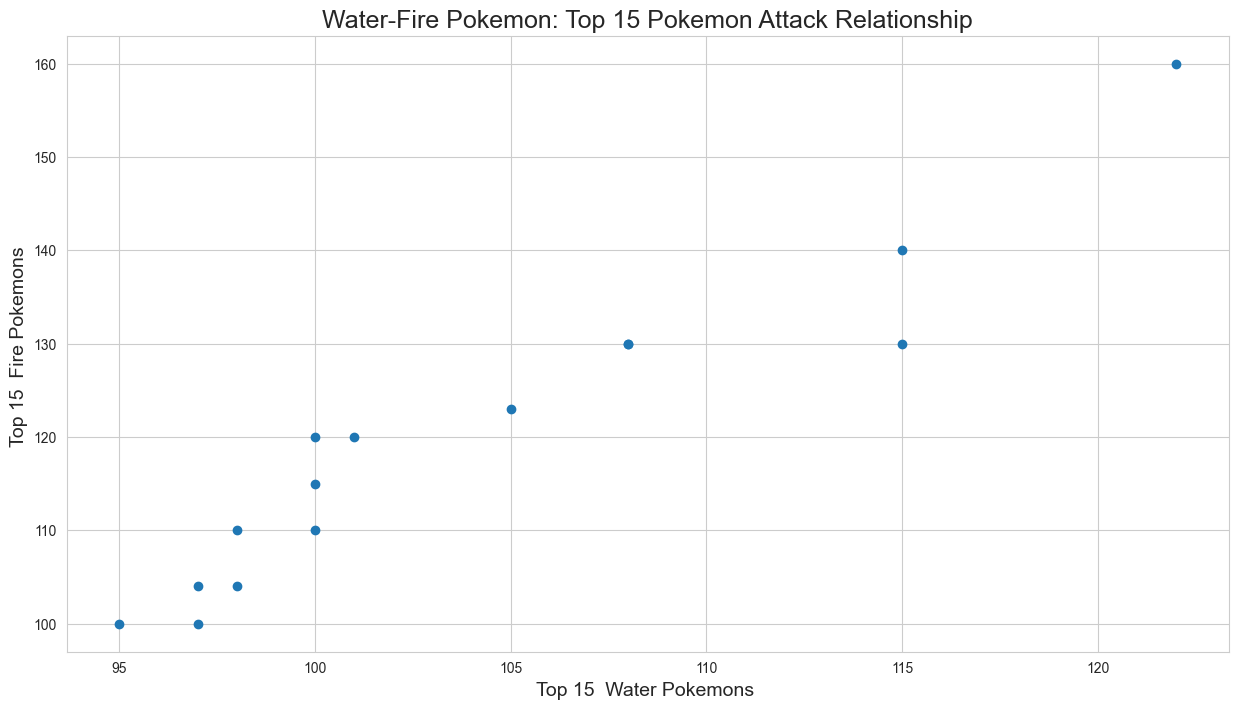

In [117]:
plt.figure(figsize=(15,8))
plt.scatter(Water_pokemon,fire_pokemon)
plt.title("Water-Fire Pokemon: Top 15 Pokemon Attack Relationship",fontsize=18)
plt.xlabel("Top 15  Water Pokemons ",fontsize=14)
plt.ylabel("Top 15  Fire Pokemons ",fontsize=14)

### Merge Two DataFrames


In [128]:
flying_dragon =  df[(df['Type 1']=="Flying") & (df['Type 2']=='Dragon')]
dragon_flying = df[(df['Type 2']=="Flying") & (df['Type 1']=='Dragon')]


In [129]:
dragon = pd.concat([flying_dragon,dragon_flying])
dragon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
365,334,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
408,373,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
409,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
425,384,Rayquaza,Dragon,Flying,105,150,90,150,90,95,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True


In [130]:
print("We have total of {} dragons that can fly".format(len(dragon)))


We have total of 8 dragons that can fly


### Top Pokemon Analysis And Battle


<Axes: title={'center': 'Top 20 Pokemon  fastest'}, xlabel='Name', ylabel='Speed'>

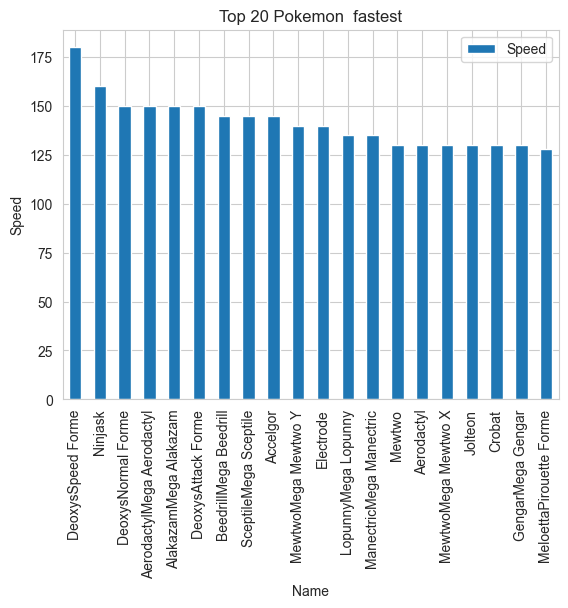

In [144]:
top20_pokemon = df.loc[:,["Name","Speed",'Type 1']].sort_values(by="Speed", ascending=False)[:20]
top20_pokemon.set_index("Name",inplace=True)
top20_pokemon.plot(kind="bar",ylabel="Speed",title="Top 20 Pokemon  fastest")



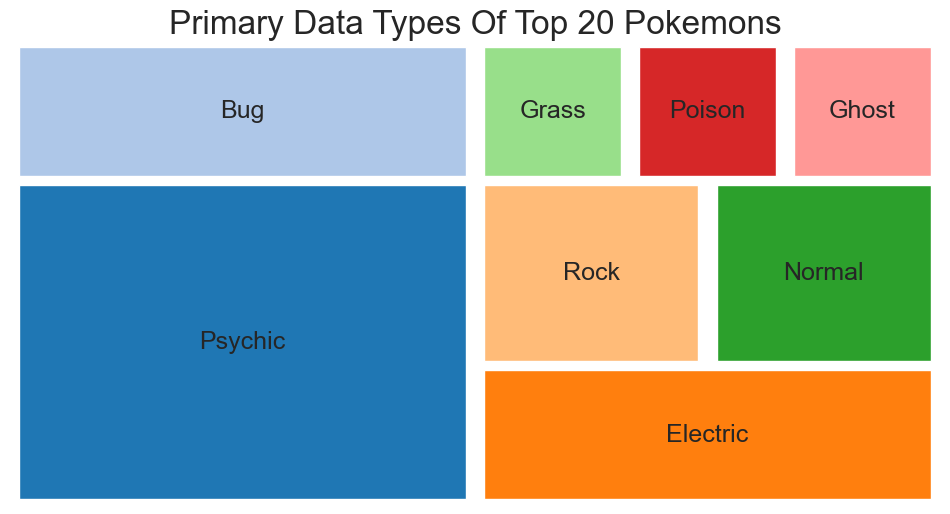

In [167]:
plt.figure(figsize=(12,6))
plt.axis("off")
axis = squarify.plot(top20_pokemon['Type 1'].value_counts(), 
              label=top20_pokemon['Type 1'].value_counts().index,
             color=sns.color_palette("tab20", len(top20_pokemon['Type 1'].value_counts())),
              pad=1,
              text_kwargs={'fontsize': 18})
axis.set_title("Primary Data Types Of Top 20 Pokemons",fontsize=24)
plt.savefig("pokemon.png")